# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'sales.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Observations
1. Avg expense spend is highest on TV
2. Avg expense spend is highest on Radio
3.  Max sale is 27 and Min sale is 1.6

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.shape

(200, 4)

# Handling the missing values

In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

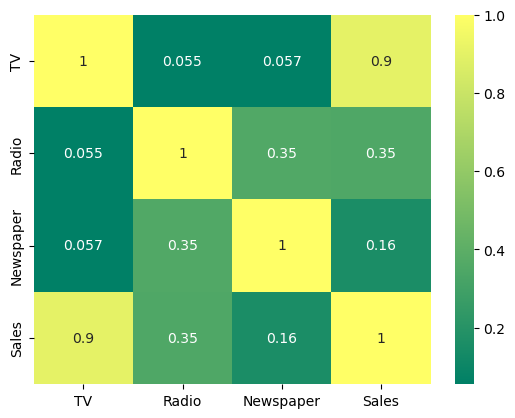

In [6]:
# Checking the correlation w.r.t other variables
corr = data.corr()
sns.heatmap(corr, annot= True, cmap = 'summer')
plt.show()

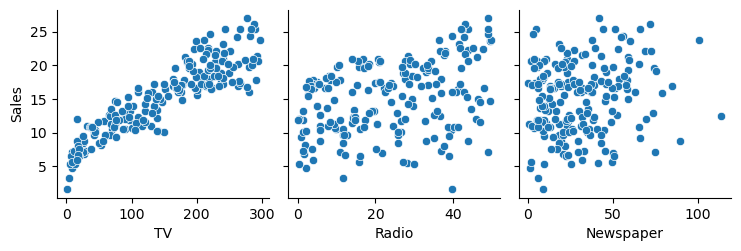

In [7]:
#visualize through scatter plot
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind= "scatter")
plt.show()


# Observation
1. When ads expense increases, TV ads sale also increases
2. For Radio and Newspaper is unpredictable

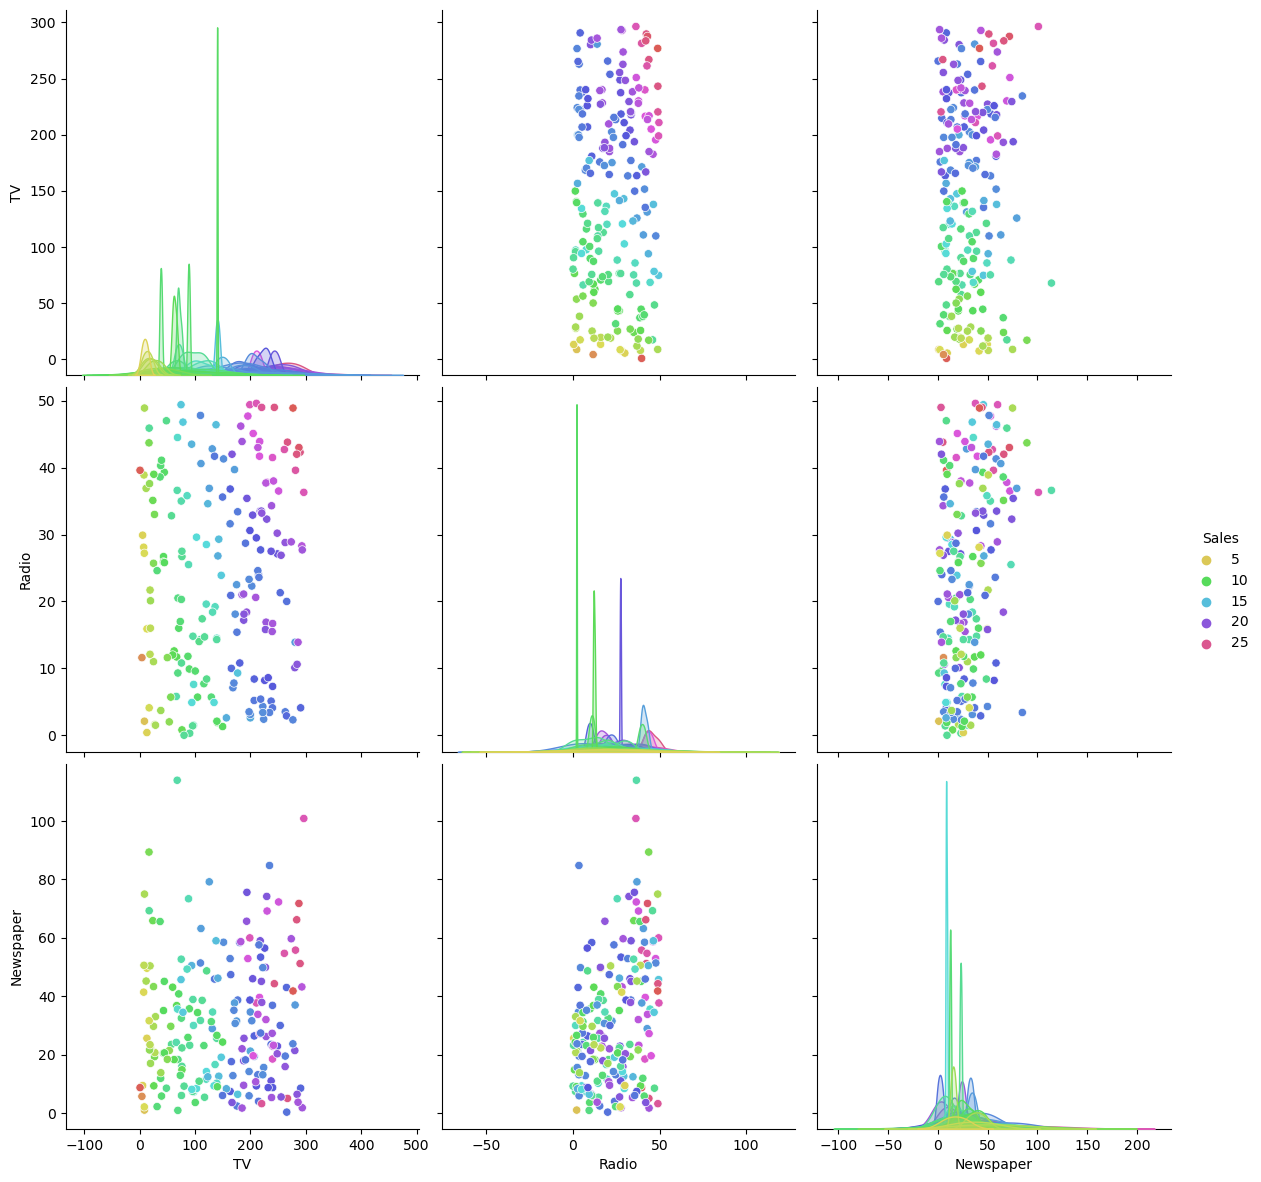

In [8]:
sns.pairplot(data, kind = 'scatter', aspect = 1, height = 4, palette = 'hls', hue='Sales')

<AxesSubplot:ylabel='Frequency'>

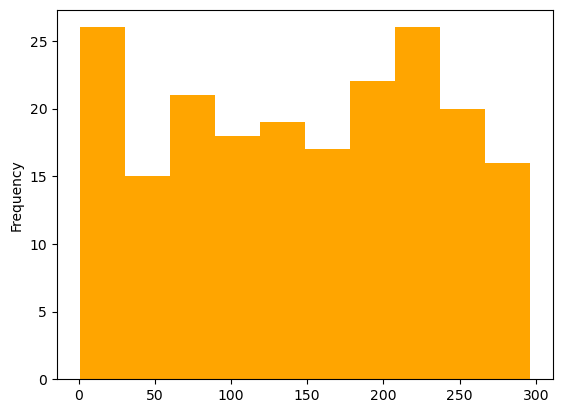

In [9]:
# Plotting a histogram
data["TV"].plot.hist(bins= 10, color = "orange")

<AxesSubplot:ylabel='Frequency'>

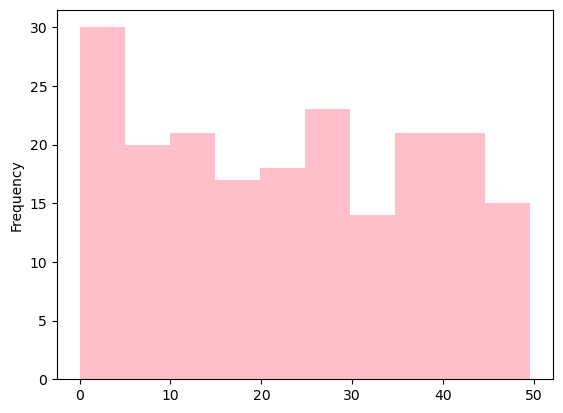

In [10]:
data["Radio"].plot.hist(bins= 10, color = "pink")


# Model training

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing data

In [23]:
x = data[['TV', 'Radio', 'Newspaper']] # Features
y = data['Sales'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor


In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42) # Creating the model with 100 decision trees
model.fit(x_train, y_train)



RandomForestRegressor(random_state=42)

# Predicting values for testing data

In [25]:
y_pred = model.predict(x_test)

# Checking models accuracy score using R-squared value

In [26]:
score = model.score(x_test, y_test) # Evaluating the model using R-squared value for the test data
print("R-squared: ", score*100, "%")

R-squared:  94.02075483725679 %
